In [123]:
from sklearn.model_selection import GridSearchCV

# 지도학습 _분류분석_컬럼선택법_클래스불균형_모델성능향상 시키기


# 중요 컬럼 선택하기-3가지 방법
**컬럼을 어떻게 선택하느냐에따라 모델성능이 달라짐**
1. EDA를 통해 종속변수와 중요한 관계인 변수들만 선택
2. 수치형 변수는 상관분석 결과를 통해, 범주형 변수는 카이제곱 통계량(통계학적 방법) 이용하여 체크후 중복제거하는 방법.
3. 머신러닝 알고리즘을 통한 1차 분석 후 중요하게 사용된 변수만 선택 (시간이 없을경우 1번보다 유용)

# tree 계열 모델의 feature_importance로 선택
- 트리계열 모델 중 내부에 feature_importance를 출력할 수 있는 모델이 있음
- 어떤 질문을 던졌을때 분류가 잘됐는지와 같은 정보
- tree계열은 질문에 대한 답을 내부에 저장하여서 모델내부에 결론이 이미 나있고, 질문을 마친후 다시

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [3]:
# 모델 학습
from sklearn.model_selection import train_test_split
# 결정나무
from sklearn.tree import DecisionTreeClassifier
# 평가 지표
from sklearn.metrics import accuracy_score,classification_report

In [63]:
data0 = pd.read_csv("./data/salary2.csv")
data0.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [64]:
data= data0.copy()

In [68]:
data1= data0.copy()

# RandomForest

In [65]:
data=data.drop_duplicates()

In [66]:
data=data.dropna()

In [9]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48836,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [8]:
# 인덱스가 중구난방???? 
data=data.reset_index(drop=True)
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39235,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
39236,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
39237,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
39238,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [9]:
# 카테고리컬럼을 숫자로 바꾸기
# 이후 겟더미 이후 모델에 바로넣기
data['class'] # 찍어보기

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
39235      >50K
39236     <=50K
39237     <=50K
39238     <=50K
39239      >50K
Name: class, Length: 39240, dtype: object

In [10]:
# 람다로 50K초과인 값들만 1로 바꾸기
data['class'].apply(lambda x:1 if x==' >50K' else 0)

0        0
1        0
2        1
3        1
4        0
        ..
39235    1
39236    0
39237    0
39238    0
39239    1
Name: class, Length: 39240, dtype: int64

In [11]:
# 재할당
data['class']=data['class'].apply(lambda x:1 if x==' >50K' else 0)
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39235,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
39236,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
39237,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
39238,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [12]:
# 0,1 된점 확인후 
# 더미변수들 만들기
pd.get_dummies(data, drop_first=True)

,age,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,25,7,0,0,40,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,0,0,50,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,0,0,40,1,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,7688,0,40,1,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,34,6,0,0,30,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39235,53,14,0,0,40,1,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
39236,22,10,0,0,40,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
39237,27,12,0,0,38,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
39238,58,9,0,0,40,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [13]:
# 재할당
data=pd.get_dummies(data, drop_first=True)

In [14]:
# X,y분리
X = data.drop('class',axis=1)
y = data['class']
y # 확인

0        0
1        0
2        1
3        1
4        0
        ..
39235    1
39236    0
39237    0
39238    0
39239    1
Name: class, Length: 39240, dtype: int64

In [15]:
# 모델에 넣기
from sklearn.model_selection import train_test_split

In [16]:
y.value_counts()

class
0    29265
1     9975
Name: count, dtype: int64

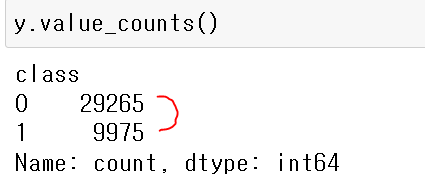
0과 1은 3:1 정도되는 상황에서 
train_test_split을 이용할때 주의할 점 stratify를 정해주지 않는 경우에는 데이터셋의 비율이 3:1보다 더벌어질 수 있음(일정하게 유지될 수 있게 y를 stratify에 넣어줘야함) <br> 하나도 안들어갈수도있기때문에 타겟변수인y를 넣어야함.

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.4, stratify=y, random_state=10)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
from sklearn.metrics import classification_report

In [22]:
dtc= DecisionTreeClassifier(random_state=10)
dtc.fit(X_train, y_train)
pred=dtc.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87     11706
           1       0.61      0.60      0.60      3990

    accuracy                           0.80     15696
   macro avg       0.74      0.73      0.73     15696
weighted avg       0.80      0.80      0.80     15696



In [23]:
# max_depth 추가하기
dtc= DecisionTreeClassifier(max_depth=9,random_state=10)
dtc.fit(X_train, y_train)
pred=dtc.predict(X_test)
print(classification_report(y_test,pred))

# feature importance 출력은 아래

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11706
           1       0.77      0.58      0.66      3990

    accuracy                           0.85     15696
   macro avg       0.82      0.76      0.78     15696
weighted avg       0.84      0.85      0.84     15696



dtc가 최종모델이라는 가정하에
# feature_importance 출력하기
```만든모델명.feature_importances_```<br>
numpyarray 형태로 출력되므로<br>
```pd.DataFrame()```<br> 
```pd.DataFrame(dtc.feature_names_in_)```
현재 예제로는 row가 95개며 중요한 순서대로 컬럼명이 나옴

In [24]:
dtc.feature_importances_

array([3.87298163e-02, 1.94695260e-01, 2.16183200e-01, 7.88452890e-02,
       3.11100476e-02, 7.86362786e-04, 3.00616991e-04, 1.32226325e-03,
       6.94831955e-03, 3.00616991e-04, 0.00000000e+00, 1.55271178e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.00616991e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.77706399e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.87210779e-04, 4.00572600e-01,
       0.00000000e+00, 9.05561294e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.85406398e-04, 1.15203423e-02, 4.86615975e-03,
       1.64168110e-04, 0.00000000e+00, 5.04332704e-04, 0.00000000e+00,
       2.21530575e-04, 5.14054400e-04, 7.51542477e-05, 0.00000000e+00,
       4.44128409e-04, 2.25462743e-04, 0.00000000e+00, 3.11569117e-04,
       0.00000000e+00, 9.87298395e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.54170783e-03, 5.53078499e-04,
      

In [25]:
pd.DataFrame(dtc.feature_importances_)

,0
0,0.038730
1,0.194695
2,0.216183
3,0.078845
4,0.031110
...,...
90,0.000000
91,0.000000
92,0.000000
93,0.000000


In [26]:
pd.DataFrame(dtc.feature_names_in_)

,0
0,age
1,education-num
2,capital-gain
3,capital-loss
4,hours-per-week
...,...
90,native-country_ Thailand
91,native-country_ Trinadad&Tobago
92,native-country_ United-States
93,native-country_ Vietnam


In [27]:
# 담기
importance= pd.DataFrame(dtc.feature_importances_)

In [28]:
# 담기
cols= pd.DataFrame(dtc.feature_names_in_)

In [29]:
pd.concat([cols, importance], axis=1)

,0,0
0,age,0.038730
1,education-num,0.194695
2,capital-gain,0.216183
3,capital-loss,0.078845
4,hours-per-week,0.031110
...,...,...
90,native-country_ Thailand,0.000000
91,native-country_ Trinadad&Tobago,0.000000
92,native-country_ United-States,0.000000
93,native-country_ Vietnam,0.000000


In [30]:
# 담기
important_cols= pd.concat([cols, importance], axis=1)

In [31]:
# 컬럼명 바꾸기
important_cols.columns=['column','importance']
important_cols

,column,importance
0,age,0.038730
1,education-num,0.194695
2,capital-gain,0.216183
3,capital-loss,0.078845
4,hours-per-week,0.031110
...,...,...
90,native-country_ Thailand,0.000000
91,native-country_ Trinadad&Tobago,0.000000
92,native-country_ United-States,0.000000
93,native-country_ Vietnam,0.000000


In [32]:
# 중요한 순서로 정렬
important_cols.sort_values(by='importance',ascending=False)

,column,importance
27,marital-status_ Married-civ-spouse,0.400573
2,capital-gain,0.216183
1,education-num,0.194695
3,capital-loss,0.078845
0,age,0.038730
...,...,...
90,native-country_ Thailand,0.000000
91,native-country_ Trinadad&Tobago,0.000000
92,native-country_ United-States,0.000000
93,native-country_ Vietnam,0.000000


In [32]:
# 담기
important_cols = important_cols.sort_values(by='importance',ascending=False)

- 연봉 데이터는 '>50K'가 1, <=50K가 

In [33]:
# 0이 아닌 것들 필터링
important_cols[important_cols['importance']>0]

# 개수확인

,column,importance
27,marital-status_ Married-civ-spouse,0.400573
2,capital-gain,0.216183
1,education-num,0.194695
3,capital-loss,0.078845
0,age,0.038730
4,hours-per-week,0.031110
34,occupation_ Exec-managerial,0.011520
8,workclass_ Self-emp-not-inc,0.006948
35,occupation_ Farming-fishing,0.004866
54,sex_ Male,0.003542


### 분석 모델에 가장 중요하게 사용되었던 변수를 확인 
- 40%의 중요도 marital-status였음
- 예상한것과 다른 변수가 중요하게 작용했음을 알 수 있음
- 아래 변수들만 가지고도 91수준의 성능
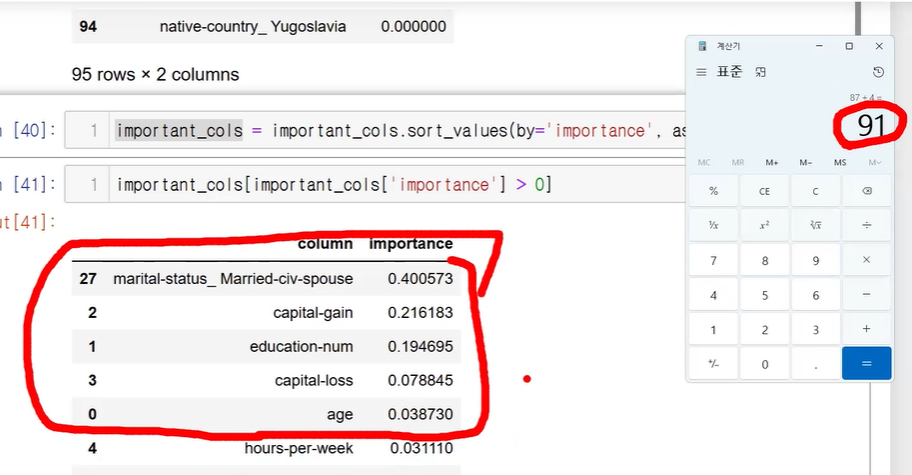

# random_forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc= RandomForestClassifier(random_state=10)
rfc.fit(X_train, y_train)
pred=rfc.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     11706
           1       0.68      0.60      0.64      3990

    accuracy                           0.83     15696
   macro avg       0.77      0.75      0.76     15696
weighted avg       0.82      0.83      0.82     15696



In [42]:
importance2 = pd.DataFrame(rfc.feature_importances_, columns=['importance'])
column2 = pd.DataFrame(rfc.feature_names_in_, columns=['column'])
rfc_importance= pd.concat([column2, importance2], axis=1)
rfc_importance

,column,importance
0,age,0.229726
1,education-num,0.060181
2,capital-gain,0.122142
3,capital-loss,0.041190
4,hours-per-week,0.117826
...,...,...
90,native-country_ Thailand,0.000140
91,native-country_ Trinadad&Tobago,0.000107
92,native-country_ United-States,0.006653
93,native-country_ Vietnam,0.000283


### 랜덤포레스트 모델에서 중요 변수

In [44]:
rfc_importance[rfc_importance['importance']>0.01].sort_values(by='importance',ascending=False)

,column,importance
0,age,0.229726
2,capital-gain,0.122142
4,hours-per-week,0.117826
27,marital-status_ Married-civ-spouse,0.083482
1,education-num,0.060181
3,capital-loss,0.041190
29,marital-status_ Never-married,0.034063
34,occupation_ Exec-managerial,0.019778
54,sex_ Male,0.019321
45,relationship_ Not-in-family,0.017576


## xgboost

In [45]:
from xgboost import XGBClassifier

In [46]:
xgb= XGBClassifier(random_state=10)
xgb.fit(X_train, y_train)
pred=xgb.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     11706
           1       0.77      0.67      0.71      3990

    accuracy                           0.86     15696
   macro avg       0.83      0.80      0.81     15696
weighted avg       0.86      0.86      0.86     15696



In [49]:
importance3 = pd.DataFrame(xgb.feature_importances_ ,columns=['importance'])
column3 = pd.DataFrame(xgb.feature_names_in_ ,columns=['column'])

### xgboost모델의 중요 변수

In [50]:
importance3 = pd.concat([column3, importance3], axis=1)
importance3 =importance3[importance3['importance']>0.01].sort_values(by='importance',ascending=False)
importance3

,column,importance
27,marital-status_ Married-civ-spouse,0.413689
2,capital-gain,0.058502
1,education-num,0.046971
38,occupation_ Other-service,0.033853
3,capital-loss,0.024621
35,occupation_ Farming-fishing,0.023159
34,occupation_ Exec-managerial,0.021343
47,relationship_ Own-child,0.015753
40,occupation_ Prof-specialty,0.013670
79,native-country_ Mexico,0.013073


## 예측에 영향이 컸던 변수들만 담아 새로운 데이터.

In [54]:
data0.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [82]:
# data0 카피할때 이미 했음
data1=data1.drop_duplicates()
data1=data1.dropna()
data3=data1[['age','class','marital-status','capital-gain','education-num','sex','occupation']]

In [83]:
# 인덱스 리셋
data3=data3.reset_index(drop=True)
data3

,age,class,marital-status,capital-gain,education-num,sex,occupation
0,25,<=50K,Never-married,0,7,Male,Machine-op-inspct
1,38,<=50K,Married-civ-spouse,0,9,Male,Farming-fishing
2,28,>50K,Married-civ-spouse,0,12,Male,Protective-serv
3,44,>50K,Married-civ-spouse,7688,10,Male,Machine-op-inspct
4,34,<=50K,Never-married,0,6,Male,Other-service
...,...,...,...,...,...,...,...
39235,53,>50K,Married-civ-spouse,0,14,Male,Exec-managerial
39236,22,<=50K,Never-married,0,10,Male,Protective-serv
39237,27,<=50K,Married-civ-spouse,0,12,Female,Tech-support
39238,58,<=50K,Widowed,0,9,Female,Adm-clerical


In [85]:
data3= pd.get_dummies(data3, drop_first=True)

In [86]:
X= data3.drop('class_ >50K', axis=1)
y= data3['class_ >50K']

In [87]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.4,stratify=y, random_state=10)

In [88]:
# xgb 이미 import
xgb = XGBClassifier(random_state=10)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.88      0.92      0.90     11706
        True       0.74      0.63      0.68      3990

    accuracy                           0.85     15696
   macro avg       0.81      0.78      0.79     15696
weighted avg       0.84      0.85      0.84     15696



### xgboost모델의 중요 변수 

In [89]:
importance3 = pd.DataFrame(xgb.feature_importances_ ,columns=['importance'])
column3 = pd.DataFrame(xgb.feature_names_in_ ,columns=['column'])

In [90]:
importance3 = pd.concat([column3, importance3], axis=1)
importance3 =importance3[importance3['importance']>0.01].sort_values(by='importance',ascending=False)
importance3

,column,importance
4,marital-status_ Married-civ-spouse,0.510269
1,capital-gain,0.098340
16,occupation_ Other-service,0.060809
2,education-num,0.054121
12,occupation_ Exec-managerial,0.039717
13,occupation_ Farming-fishing,0.039125
14,occupation_ Handlers-cleaners,0.023700
18,occupation_ Prof-specialty,0.019154
17,occupation_ Priv-house-serv,0.017284
6,marital-status_ Never-married,0.015041


변수 개수가 줄어들지만 결과는 거의 동일한 상황

In [91]:
y.value_counts()

class_ >50K
False    29265
True      9975
Name: count, dtype: int64

# 클래스 불균형을 처리하는 방법
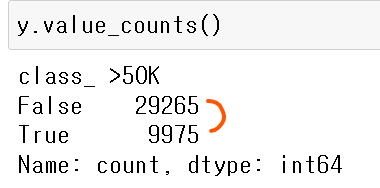
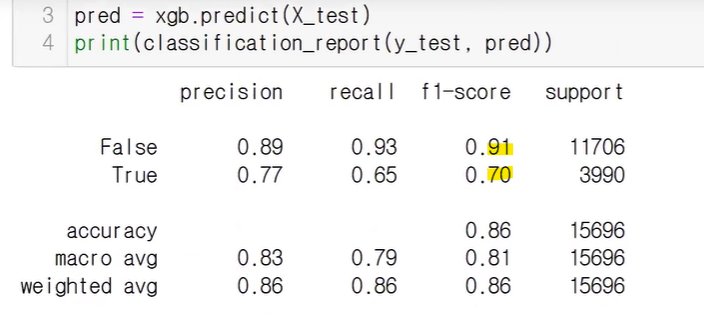
- 종속변수의 클래스(값,요소) 간의 비율 차이
- 연봉 데이터의 경우 >50K가 1, <=50k가 3의 비율을 가짐
    -소득이 더 적은경우가 많아서 학습량 차이->불균형
- train_test_split시 stratify= 옵션이필수.
- 향상시키기) 머신러닝 알고리즘 옵션을 통해 소수 클래스에 가중치 주기.<br> <br>
**DecisionTree의 경우**
```DecisionTreeClassifier(class_weight="balanced")```

In [92]:
# 가중치 class_weight 특정 클래스에 비중주기
dtc = DecisionTreeClassifier(class_weight="balanced", random_state=10)
dtc.fit(X_train, y_train)
pred=dtc.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.90      0.79      0.84     11706
        True       0.55      0.75      0.64      3990

    accuracy                           0.78     15696
   macro avg       0.73      0.77      0.74     15696
weighted avg       0.81      0.78      0.79     15696



In [93]:
# max_depth 튜닝
for i in range(1,20):
    dtc = DecisionTreeClassifier(max_depth=i, class_weight="balanced", random_state=10)
    dtc.fit(X_train, y_train)
    pred=dtc.predict(X_test)
    
    print(i)
    print(classification_report(y_test,pred))
    print()

1
              precision    recall  f1-score   support

       False       0.92      0.67      0.78     11706
        True       0.47      0.83      0.60      3990

    accuracy                           0.71     15696
   macro avg       0.69      0.75      0.69     15696
weighted avg       0.81      0.71      0.73     15696


2
              precision    recall  f1-score   support

       False       0.94      0.67      0.78     11706
        True       0.48      0.88      0.62      3990

    accuracy                           0.72     15696
   macro avg       0.71      0.77      0.70     15696
weighted avg       0.82      0.72      0.74     15696


3
              precision    recall  f1-score   support

       False       0.89      0.85      0.87     11706
        True       0.62      0.70      0.66      3990

    accuracy                           0.81     15696
   macro avg       0.76      0.78      0.76     15696
weighted avg       0.82      0.81      0.82     15696


4
        

In [96]:
# RandomForest 
for i in range(1,20):
    rfc = RandomForestClassifier(max_depth=i,n_estimators=10, n_jobs=-1, class_weight="balanced", random_state=10)
    rfc.fit(X_train, y_train)
    pred=rfc.predict(X_test)

    print(i)
    print(classification_report(y_test,pred))
    print()

1
              precision    recall  f1-score   support

       False       0.91      0.49      0.63     11706
        True       0.37      0.87      0.51      3990

    accuracy                           0.58     15696
   macro avg       0.64      0.68      0.57     15696
weighted avg       0.78      0.58      0.60     15696


2
              precision    recall  f1-score   support

       False       0.92      0.73      0.81     11706
        True       0.50      0.81      0.62      3990

    accuracy                           0.75     15696
   macro avg       0.71      0.77      0.72     15696
weighted avg       0.81      0.75      0.76     15696


3
              precision    recall  f1-score   support

       False       0.94      0.69      0.80     11706
        True       0.49      0.87      0.63      3990

    accuracy                           0.74     15696
   macro avg       0.72      0.78      0.71     15696
weighted avg       0.83      0.74      0.75     15696


4
        

xgboost scale_pos_weight=적당한 값

In [97]:
#  xgboost 
for i in range(1,20):
    xgb = XGBClassifier(max_depth=i,sclae_pos_weight=3, n_estimators=500, n_jobs=-1,  random_state=10)
    xgb.fit(X_train, y_train)
    pred=xgb.predict(X_test)

    print(i)
    print(classification_report(y_test,pred))
    print()

C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sclae_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


1
              precision    recall  f1-score   support

       False       0.87      0.93      0.90     11706
        True       0.75      0.60      0.67      3990

    accuracy                           0.85     15696
   macro avg       0.81      0.77      0.78     15696
weighted avg       0.84      0.85      0.84     15696




C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sclae_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


2
              precision    recall  f1-score   support

       False       0.88      0.93      0.90     11706
        True       0.75      0.63      0.68      3990

    accuracy                           0.85     15696
   macro avg       0.81      0.78      0.79     15696
weighted avg       0.85      0.85      0.85     15696




C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sclae_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


3
              precision    recall  f1-score   support

       False       0.88      0.93      0.90     11706
        True       0.74      0.63      0.68      3990

    accuracy                           0.85     15696
   macro avg       0.81      0.78      0.79     15696
weighted avg       0.84      0.85      0.85     15696




C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sclae_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


4
              precision    recall  f1-score   support

       False       0.88      0.92      0.90     11706
        True       0.73      0.64      0.68      3990

    accuracy                           0.85     15696
   macro avg       0.81      0.78      0.79     15696
weighted avg       0.84      0.85      0.84     15696




C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sclae_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


5
              precision    recall  f1-score   support

       False       0.88      0.92      0.90     11706
        True       0.73      0.63      0.68      3990

    accuracy                           0.85     15696
   macro avg       0.80      0.77      0.79     15696
weighted avg       0.84      0.85      0.84     15696




C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sclae_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


6
              precision    recall  f1-score   support

       False       0.88      0.91      0.90     11706
        True       0.71      0.63      0.67      3990

    accuracy                           0.84     15696
   macro avg       0.79      0.77      0.78     15696
weighted avg       0.84      0.84      0.84     15696




C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sclae_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


7
              precision    recall  f1-score   support

       False       0.88      0.91      0.89     11706
        True       0.70      0.63      0.66      3990

    accuracy                           0.84     15696
   macro avg       0.79      0.77      0.78     15696
weighted avg       0.83      0.84      0.83     15696




C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sclae_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


8
              precision    recall  f1-score   support

       False       0.87      0.91      0.89     11706
        True       0.69      0.62      0.65      3990

    accuracy                           0.83     15696
   macro avg       0.78      0.76      0.77     15696
weighted avg       0.83      0.83      0.83     15696




C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sclae_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


9
              precision    recall  f1-score   support

       False       0.87      0.90      0.89     11706
        True       0.69      0.61      0.65      3990

    accuracy                           0.83     15696
   macro avg       0.78      0.76      0.77     15696
weighted avg       0.83      0.83      0.83     15696




C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sclae_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


10
              precision    recall  f1-score   support

       False       0.87      0.90      0.89     11706
        True       0.67      0.62      0.64      3990

    accuracy                           0.83     15696
   macro avg       0.77      0.76      0.76     15696
weighted avg       0.82      0.83      0.82     15696




C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sclae_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


11
              precision    recall  f1-score   support

       False       0.87      0.90      0.89     11706
        True       0.67      0.61      0.64      3990

    accuracy                           0.83     15696
   macro avg       0.77      0.76      0.76     15696
weighted avg       0.82      0.83      0.82     15696




C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sclae_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


12
              precision    recall  f1-score   support

       False       0.87      0.89      0.88     11706
        True       0.66      0.62      0.64      3990

    accuracy                           0.82     15696
   macro avg       0.77      0.76      0.76     15696
weighted avg       0.82      0.82      0.82     15696




C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sclae_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


13
              precision    recall  f1-score   support

       False       0.87      0.89      0.88     11706
        True       0.65      0.62      0.63      3990

    accuracy                           0.82     15696
   macro avg       0.76      0.75      0.76     15696
weighted avg       0.82      0.82      0.82     15696




C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sclae_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


14
              precision    recall  f1-score   support

       False       0.87      0.89      0.88     11706
        True       0.65      0.61      0.63      3990

    accuracy                           0.82     15696
   macro avg       0.76      0.75      0.76     15696
weighted avg       0.81      0.82      0.82     15696




C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sclae_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


15
              precision    recall  f1-score   support

       False       0.87      0.89      0.88     11706
        True       0.65      0.62      0.63      3990

    accuracy                           0.82     15696
   macro avg       0.76      0.75      0.76     15696
weighted avg       0.82      0.82      0.82     15696




C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sclae_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


16
              precision    recall  f1-score   support

       False       0.87      0.89      0.88     11706
        True       0.65      0.62      0.63      3990

    accuracy                           0.82     15696
   macro avg       0.76      0.75      0.76     15696
weighted avg       0.82      0.82      0.82     15696




C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sclae_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


17
              precision    recall  f1-score   support

       False       0.87      0.89      0.88     11706
        True       0.65      0.61      0.63      3990

    accuracy                           0.82     15696
   macro avg       0.76      0.75      0.76     15696
weighted avg       0.81      0.82      0.82     15696




C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sclae_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


18
              precision    recall  f1-score   support

       False       0.87      0.89      0.88     11706
        True       0.65      0.61      0.63      3990

    accuracy                           0.82     15696
   macro avg       0.76      0.75      0.75     15696
weighted avg       0.81      0.82      0.82     15696




C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sclae_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


19
              precision    recall  f1-score   support

       False       0.87      0.89      0.88     11706
        True       0.65      0.62      0.63      3990

    accuracy                           0.82     15696
   macro avg       0.76      0.75      0.75     15696
weighted avg       0.81      0.82      0.82     15696




#### lightgbm 
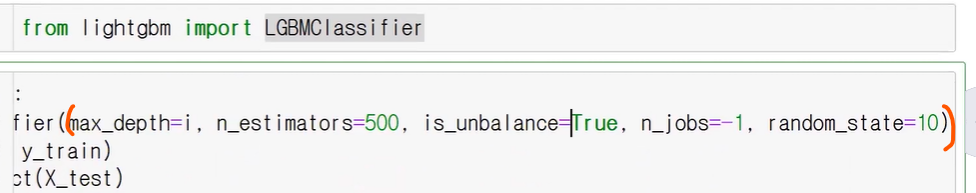
#### verbose=-1
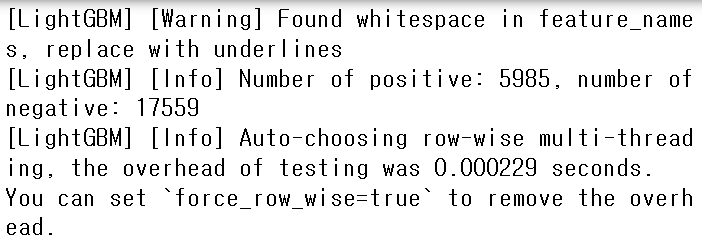
위 내용 삭제옵션

In [98]:
from lightgbm import LGBMClassifier

In [102]:
#  lightgbm 
for i in range(1,20):
    lgbm = LGBMClassifier(verbose=-1,max_depth=i,is_unbalance=True, n_estimators=500, n_jobs=-1,  random_state=10)
    lgbm.fit(X_train, y_train)
    pred=lgbm.predict(X_test)

    print(i)
    print(classification_report(y_test,pred))
    print()

1
              precision    recall  f1-score   support

       False       0.94      0.80      0.86     11706
        True       0.59      0.84      0.69      3990

    accuracy                           0.81     15696
   macro avg       0.76      0.82      0.78     15696
weighted avg       0.85      0.81      0.82     15696


2
              precision    recall  f1-score   support

       False       0.94      0.80      0.87     11706
        True       0.59      0.86      0.70      3990

    accuracy                           0.81     15696
   macro avg       0.77      0.83      0.78     15696
weighted avg       0.85      0.81      0.82     15696


3
              precision    recall  f1-score   support

       False       0.94      0.80      0.86     11706
        True       0.59      0.86      0.70      3990

    accuracy                           0.81     15696
   macro avg       0.77      0.83      0.78     15696
weighted avg       0.85      0.81      0.82     15696


4
        

lightgbm의 경우 이진분류라면 어떻게 옵션을 입력해야하는지 따로 정해야함
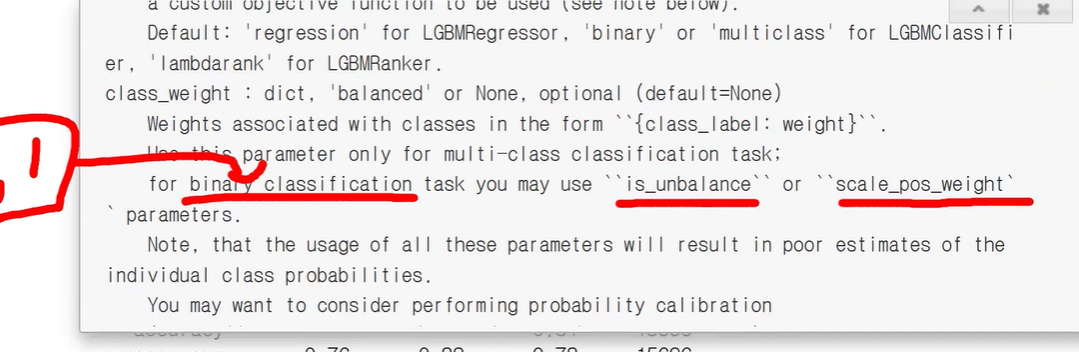

# 데이터를 증폭/축소하여 class 불균형해소
- imbalanced-learn smote/cluster-centroids
- 머신러닝 알고리즘을 통해 비슷한 데이터를 물리적으로 생성/축소 (위에 한 내용)
- **반드시 train 데이터에만 적용** <br> 가상으로 생성하여서 증폭시키는 값이므로
- 알고리즘에 따라 증폭 방법이 달라짐.
    - smote) 비계층형 군집분석 기반.
    - cluster-centroids ) 거리기반 계층형 군집분석 기반
    - smotenc ) 범주형과 수치형 함께.
- train데이터 외에 적용할 경우 테스트 데이터셋을 돌리면 현저하게 낮은 결과물이 나오므로 반드시 train데이터에만 적용
<br><br>
### imbalanced-learn 설치
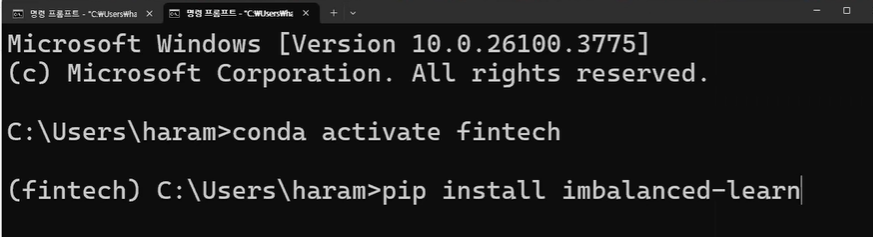
공홈의 사용자가이드 내용 - 오버샘플링
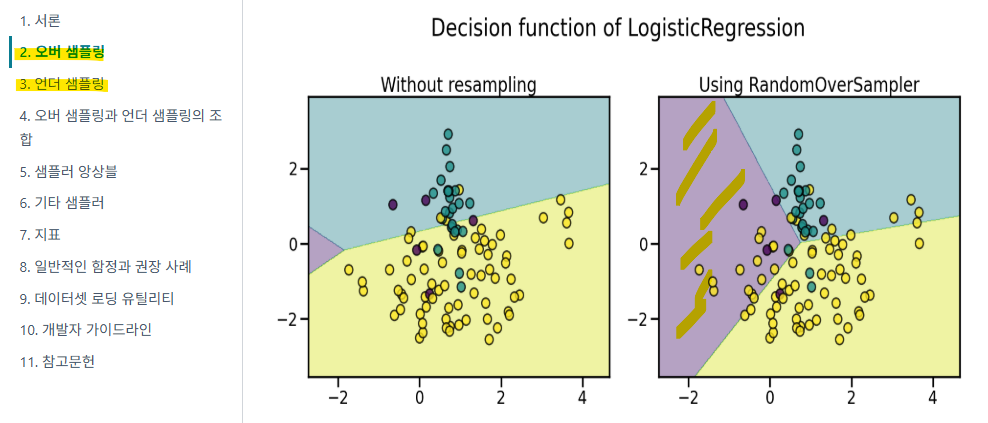
- 오버샘플링: 적은 비율의 클래스를 증폭해 전체 비율 균형을 맞춤.
- 언더샘플링은 반대로 비율이 큰쪽을 적은쪽에 맞춰 줄이기
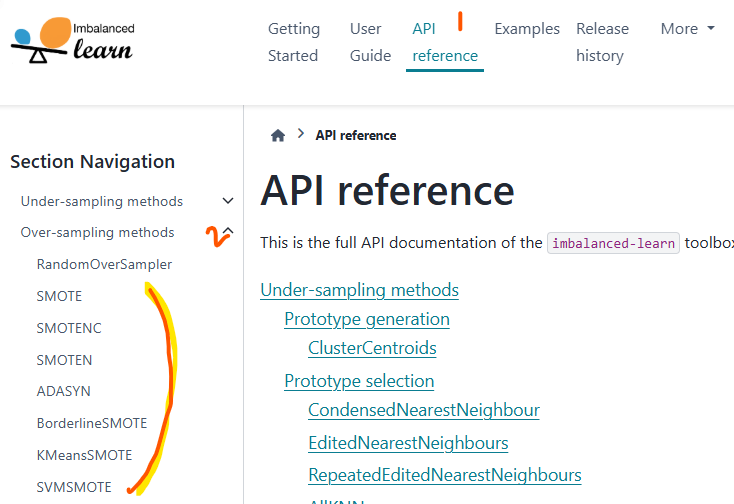
다양한 매서드들이 있음
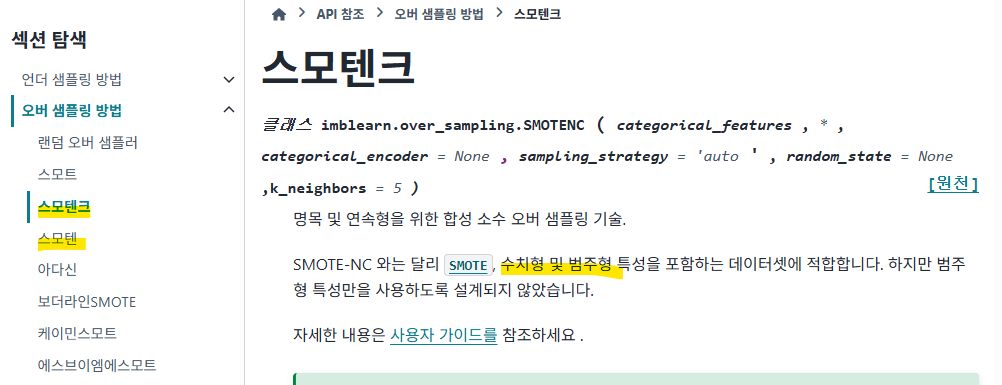
dtype에 따라 메서드 다르게 적용 주의<br>
제목 바로아래 코드 복사 사용

In [ ]:
# 복붙
class imblearn.over_sampling.SMOTENC ( categorical_features , * , categorical_encoder = None , sampling_strategy = 'auto ' , random_state = None ,k_neighbors = 5 )

In [104]:
# 수정
from imblearn.over_sampling import SMOTENC 
# 아래 더있음

In [ ]:
# 임포트코드와 분리~
smt = SMOTENC( random_state = 10 ,k_neighbors = 5 )

#### njobs 가능하면 넣는게 효율적.
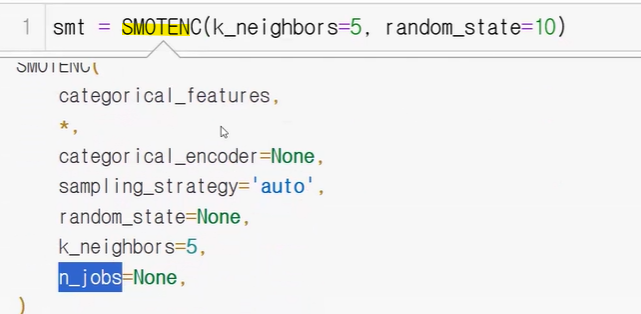

In [107]:
# 수정''' 
smt = SMOTENC( random_state = 10, n_jobs=-1 ,k_neighbors = 5 )

TypeError: __init__() missing 1 required positional argument: 'categorical_features'

In [115]:
# train데이터넣기 - categorical_features 옵션 추가하기
smt = SMOTENC(categorical_features=list(range(4, X_train.shape[1])) ,random_state=10, n_jobs=-1 ,k_neighbors=5,)
smt_X, smt_y = smt.fit_resample(X_train, y_train)

C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\imblearn\over_sampling\_smote\base.py:645: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
# categorical_features 옵션 추가하기
list(range(4, X_train.shape[1]))

In [118]:
# 증폭 됐는지 확인 
print(smt_y.value_counts())


class_ >50K
False    17559
True     17559
Name: count, dtype: int64


In [22]:
# 증폭 전
dtc= DecisionTreeClassifier(random_state=10)
dtc.fit(X_train, y_train)
pred=dtc.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87     11706
           1       0.61      0.60      0.60      3990

    accuracy                           0.80     15696
   macro avg       0.74      0.73      0.73     15696
weighted avg       0.80      0.80      0.80     15696



In [119]:
# 증폭 후
dtc2= DecisionTreeClassifier(random_state=10)
dtc2.fit(smt_X, smt_y)
pred=dtc2.predict(X_test) # 테스트들은 그대로
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.89      0.80      0.84     11706
        True       0.55      0.72      0.62      3990

    accuracy                           0.78     15696
   macro avg       0.72      0.76      0.73     15696
weighted avg       0.80      0.78      0.79     15696



### 비교결과
weight_balance 때처럼 True의 비중이 늘어나면서 실제(recall)의 True도 올라감

In [120]:
# 랜덤숲에 넣어보기(증폭된걸)
rfc2= RandomForestClassifier(random_state=10)
rfc2.fit(smt_X, smt_y)
rfc2_pred= rfc2.predict(X_test) # 테스트들은 그대로
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.89      0.80      0.84     11706
        True       0.55      0.72      0.62      3990

    accuracy                           0.78     15696
   macro avg       0.72      0.76      0.73     15696
weighted avg       0.80      0.78      0.79     15696



In [121]:
# max_depth반복문 - 랜덤숲
for i in range(1,21):
    rfc2= RandomForestClassifier(max_depth=i, random_state=10)
    rfc2.fit(smt_X, smt_y)
    rfc2_pred= rfc2.predict(X_test) # 테스트들은 그대로
    
    print(i)
    print(classification_report(y_test,pred))
    print()

1
              precision    recall  f1-score   support

       False       0.89      0.80      0.84     11706
        True       0.55      0.72      0.62      3990

    accuracy                           0.78     15696
   macro avg       0.72      0.76      0.73     15696
weighted avg       0.80      0.78      0.79     15696


2
              precision    recall  f1-score   support

       False       0.89      0.80      0.84     11706
        True       0.55      0.72      0.62      3990

    accuracy                           0.78     15696
   macro avg       0.72      0.76      0.73     15696
weighted avg       0.80      0.78      0.79     15696


3
              precision    recall  f1-score   support

       False       0.89      0.80      0.84     11706
        True       0.55      0.72      0.62      3990

    accuracy                           0.78     15696
   macro avg       0.72      0.76      0.73     15696
weighted avg       0.80      0.78      0.79     15696


4
        

In [122]:
#  max_depth -  lightgbm 
for i in range(1,20):
    lgbm = LGBMClassifier(verbose=-1,max_depth=i,is_unbalance=True, n_estimators=500, n_jobs=-1,  random_state=10)
    lgbm.fit(smt_X, smt_y)
    pred=lgbm.predict(X_test)

    print(i)
    print(classification_report(y_test,pred))
    print()

1
              precision    recall  f1-score   support

       False       0.93      0.80      0.86     11706
        True       0.58      0.83      0.68      3990

    accuracy                           0.81     15696
   macro avg       0.76      0.81      0.77     15696
weighted avg       0.84      0.81      0.81     15696


2
              precision    recall  f1-score   support

       False       0.94      0.80      0.86     11706
        True       0.59      0.85      0.70      3990

    accuracy                           0.81     15696
   macro avg       0.76      0.82      0.78     15696
weighted avg       0.85      0.81      0.82     15696


3
              precision    recall  f1-score   support

       False       0.94      0.80      0.86     11706
        True       0.59      0.85      0.70      3990

    accuracy                           0.81     15696
   macro avg       0.76      0.82      0.78     15696
weighted avg       0.85      0.81      0.82     15696


4
        

- oversampling(소수쪽 증폭) 후 드라마틱한 변화X
- is_unbalance 등 옵션이 주어지면 도움될것.


# 데이터분석 과정 재정리
1) 데이터 선택 및 로딩
2) 결측값, 이상값 탐지
3) EDA(탐색적 데이터 분석)
4) 변수 데이터타임, 서열변수, 카테고리 변수 처리
5) 변수 선택, 파생변수 생성
6) 홀드아웃(훈련데이터, 테스트 데이터로 분리)
7) 분석에 맞는 알고리즘 불러와 모델 생성
8) 분석 목적에 맞는 지표를 통해 모델성능검증
9) 하이퍼파라미터튜닝 (클래스 불균형 해소)<br> 모델에서 소수클래스 가중치 조절
10) 최종 모델 선택
<br>
**위 과정은 공통적이되, 알고리즘이 달라질것**

# k-fold 교차검증
- 모델의 균형을 위해 여러 데이터셋 사용하기
- 훈련에 사용할 데이터를 나눠서 편향 낮춤
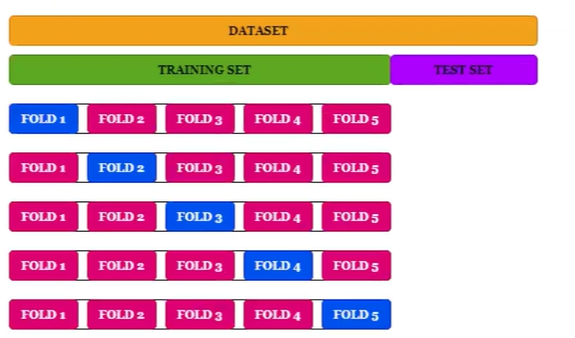
다양한 데이터셋 들어가게 교차검증
<br>
## 하이퍼 파라미터 튜닝
- 머신러닝 알고리즘에서 파라미터를 조정해 모델의 성능을 최대화
- gridsearch, randomsearch
- 기존 파라미터: max_depth, n_estimators, learning_rate
    - 교차검증(k-fold)도 파라미터로 가능.
- 파라미터가 서로 영향을 받으므로 조율에 시간이걸림
    - n_estimators(트리의 수)
    - max_depth (몇단까지 할건지)
    - learning_rate(촘촘한 정도)
#### gridsearch
- 지정한 만큼 하이퍼파라미터를 모두 탐색
- 랜덤서치보다 시간이 소요됨.
#### randomsearch
- 지정한 범위 내에서 랜덤한(띄엄띄엄) 탐색
- 직접돌리다가 놓친범위도 탐색될 수 있음
<br>
###### 튜닝실습
[그리드서치 기본구조(공홈API)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
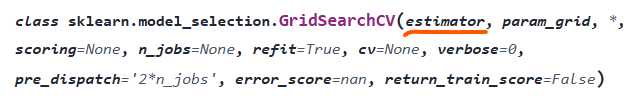
- 그리드서치 사용 전에 모델과 파라미터값은 미리 정해둔 후 입력시작.
- estimator : 모델명 자리 (DecisionTree등)
- param_grid : 딕셔너리형태를 받음<br> 파라미터가 변화되어야할 값들
- refit=True : 최적조합이 발견된다면 결과값을 받고싶은지
- cv=n : 교차검증 k-ford. n은 보통 3~5
- n_jobs : 코어조절

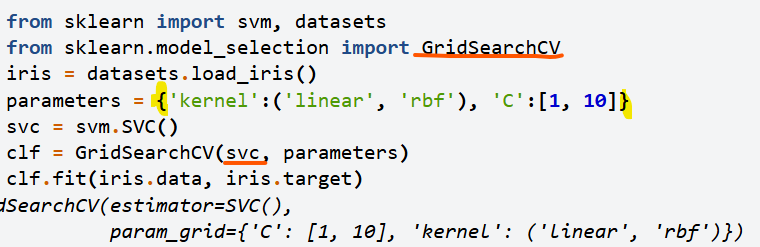
- svc는 기본값을 말함
- 나머지는 훈련데이터셋 그대로 입력

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
# 튜닝전) 알고리즘모델과 파라미터가 세팅되어있어야하므로
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# 파라미터 세팅 틀              # 간단한 파라미터 넣기 가능
model = DecisionTreeClassifier(random_state=10)
params= dict() # 들어갈 값은 DecisionTreeClassifier 참조

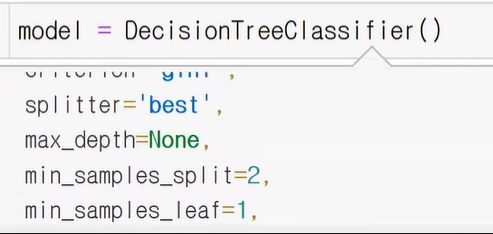
criterion을 바꿔가며 돌려야할때
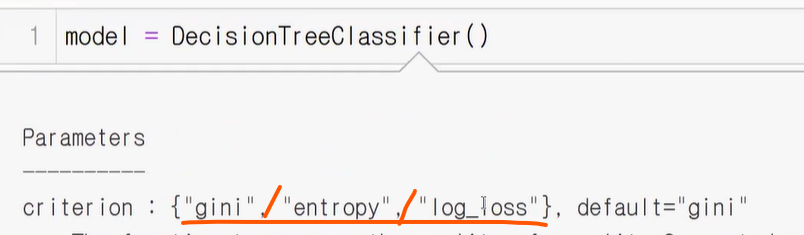
같은 방식으로 나머지도 아래와같이 경우의수에 추가할 수 있음

In [142]:
# 파라미터 세팅
model = DecisionTreeClassifier()
params= dict(criterion=["gini", "entropy", "log_loss"],
            max_depth=[1, 5, 10, 16],
            random_state=[7, 10, 77],
            class_weight=[None, 'balanced']) #none에 ""ㄴㄴ

In [ ]:
# 세팅후 튜닝'           #세팅값자리
grid_cv = GridSearchCV( model  )

In [130]:
# 세팅후 튜닝''
grid_cv = GridSearchCV(model, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)
pred= grid_cv.predict(X_test)
print("best_params: ", grid_cv.best_params_) # 메서드라서 _필수
print("best_score: ",grid_cv.best_score_)


# 그리드서치. 최적의 결과와 그때의 조건들

best_params:  {'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'random_state': 10}
best_score:  0.8399167516139995


In [131]:
# 확인) 위 조건대로 모델 돌려보면 동일한 결과 나오는지
                                # 파라미터 수정
model2= DecisionTreeClassifier( 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'random_state': 10)
model2.fit(X_train, y_train)
pred= model2.predict(X_test)
print(classification_report(y_test,pred))

SyntaxError: invalid syntax (4091776437.py, line 1)

In [132]:
# 파라미터 수정 끝
model2= DecisionTreeClassifier( class_weight=None, criterion= 'entropy', max_depth=10, random_state= 10)
model2.fit(X_train, y_train)
pred= model2.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.86      0.93      0.89     11706
        True       0.73      0.56      0.63      3990

    accuracy                           0.84     15696
   macro avg       0.80      0.75      0.76     15696
weighted avg       0.83      0.84      0.83     15696



- 결과본 후 만족하지말고 새 시도를 추천.
#### 결과를 보고 maxdepth를 손보면 좋겠다면

In [133]:
# 파라미터 세팅
model = DecisionTreeClassifier(random_state=10)
params= dict(criterion=["gini", "entropy", "log_loss"],
            max_depth=[8, 9, 10, 11, 12],
            random_state=[7, 10, 77],
            class_weight=[None, 'balanced']) #none에 ""ㄴㄴ

In [134]:
# 세팅후 튜닝''
grid_cv = GridSearchCV(model, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)
pred= grid_cv.predict(X_test)
print("best_params: ", grid_cv.best_params_) # 메서드라서 _필수
print("best_score: ",grid_cv.best_score_)


# 그리드서치. 최적의 결과와 그때의 조건들

best_params:  {'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'random_state': 10}
best_score:  0.8399167516139995


#### 실습해본 내용은 
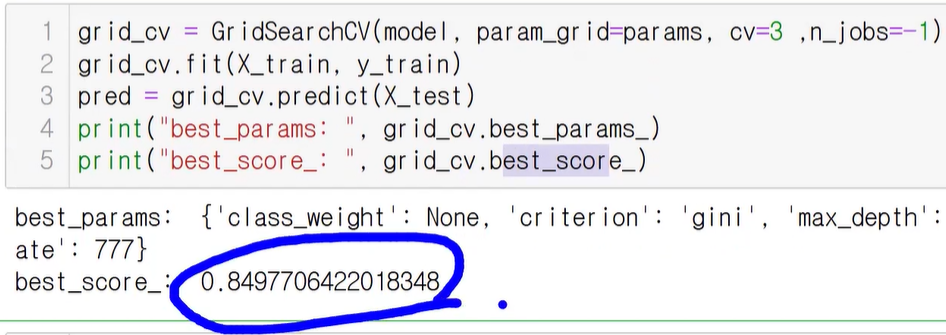
accuracy score(그리드서치의 디폴트 score)를 기준으로 나온값이고, 예를들어<br> recall을 기준으로 바꿔야할때는<br>
```scoring=[accuracy, precision, recall, f1, roc_auc]```


In [135]:
# 스코어링을 recall로 바꿈. - recall이 높은경우를 요청한것.
grid_cv = GridSearchCV(model, param_grid=params,scoring='recall', cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)
pred= grid_cv.predict(X_test)
print("best_params: ", grid_cv.best_params_) # 메서드라서 _필수
print("best_score: ",grid_cv.best_score_)


best_params:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 9, 'random_state': 10}
best_score:  0.8638262322472849


In [141]:
# 비교) recall 요청하기.
model2= DecisionTreeClassifier( class_weight='balanced', criterion= 'gini', max_depth=9, random_state= 10)
model2.fit(X_train, y_train)
pred= model2.predict(X_test)
print(classification_report(y_test,pred))

# ㅇ0ㅇ 차이남...

              precision    recall  f1-score   support

       False       0.94      0.77      0.85     11706
        True       0.56      0.85      0.67      3990

    accuracy                           0.79     15696
   macro avg       0.75      0.81      0.76     15696
weighted avg       0.84      0.79      0.80     15696



### make_scorer
클래스0(False)위주로 score 계산해야할때)
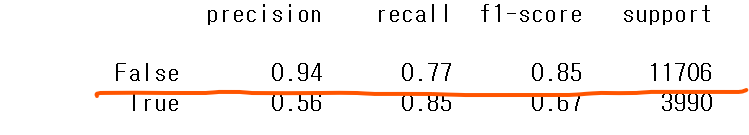

**이부분을 바꿔야함 주의**
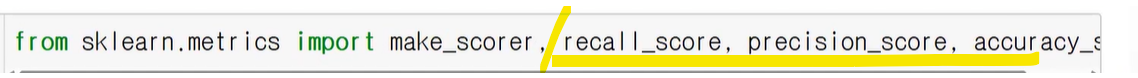

In [137]:
from sklearn.metrics import make_scorer, recall_score

In [138]:
recall_0_scorer= make_scorer(recall_score, pos_label=0)

In [144]:
# 스코어링에 대입
grid_cv = GridSearchCV(model, param_grid=params,scoring=recall_0_scorer, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)
pred= grid_cv.predict(X_test)
print("best_params: ", grid_cv.best_params_)
print("best_score: ",grid_cv.best_score_)


best_params:  {'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'random_state': 7}
best_score:  1.0


In [143]:
# 비교)
model3= DecisionTreeClassifier( class_weight=None, criterion='entropy', max_depth=10, random_state= 10)
model3.fit(X_train, y_train)
pred= model3.predict(X_test)
print(classification_report(y_test,pred))

# ㅇ0ㅇ10이상 차이나는데..?

              precision    recall  f1-score   support

       False       0.86      0.93      0.89     11706
        True       0.73      0.56      0.63      3990

    accuracy                           0.84     15696
   macro avg       0.80      0.75      0.76     15696
weighted avg       0.83      0.84      0.83     15696



# randomSearch
- 그리드서치와 비슷하나 입력하지 않은 값도 파라미터에 적용함
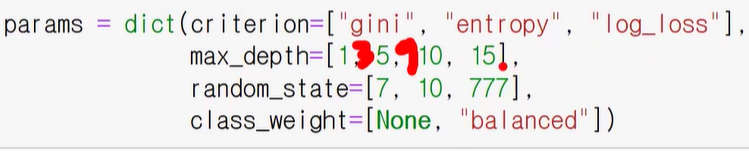
- 지정한 파라미터 값에서 랜덤성을 더해 최적의 값을 찾음
- 정식명칭: RandomizedSearchCV
- 공식복붙 <br>
```class sklearn.model_selection.RandomizedSearchCV(estimator, param_distributions, *, n_iter=10, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score=nan, return_train_score=False)```

In [142]:
# 튜닝 전 파라미터 세팅
dtc = DecisionTreeClassifier(random_state=10)
params= dict(criterion=["gini", "entropy", "log_loss"],
            max_depth=[1, 5, 10, 16],
            random_state=[7, 10, 77],
            class_weight=[None, 'balanced']) 

In [145]:
from sklearn.model_selection import RandomizedSearchCV

In [148]:
# 모델 넣기 ->                                         # 전에 만들었던 값.
rand_cv=RandomizedSearchCV(
    model, param_distributions= params, scoring='f1',
    cv=3, n_jobs=-1, random_state=10)
rand_cv.fit(X_train, y_train)
pred= rand_cv.predict(X_test)
print("best_params: ", rand_cv.best_params_)
print("best_score: ",rand_cv.best_score_)

best_params:  {'random_state': 7, 'max_depth': 5, 'criterion': 'gini', 'class_weight': 'balanced'}
best_score:  0.6700708189529486


In [149]:
# 비교)
model3= DecisionTreeClassifier( 
    class_weight='balanced', 
    criterion='gini', max_depth=5, random_state=7)
model3.fit(X_train, y_train)
pred= model3.predict(X_test)
print(classification_report(y_test,pred))

# ㅇ0ㅇ10이상 차이나는데..?

              precision    recall  f1-score   support

       False       0.94      0.75      0.84     11706
        True       0.54      0.85      0.66      3990

    accuracy                           0.78     15696
   macro avg       0.74      0.80      0.75     15696
weighted avg       0.84      0.78      0.79     15696



### XGBoost를 랜덤서치로 하이퍼파미터 튜닝

In [150]:
# XGB 모델 세팅
xgb= XGBClassifier(n_jobs=-1, random_state=10)

In [152]:
# XGB 모델 파라미터 세팅
xgb_params=dict(n_estimators=[100, 500, 1000],
               max_depth=[1,5,10,15,20],
               learning_rate=[0.1, 0.5, 1],
               booster=['gbtree', 'gblinear', 'dart'],
               scale_pos_weight=[0,3]) # 추가해야할 파라미터명 찾아야한다면 XGBClassifier에서 참조해보기

In [154]:
# 튜닝'
rand_cv = RandomizedSearchCV(
    xgb, param_distributions=xgb_params, cv=3, scoring='roc_auc', random_state=10)

In [155]:
# 튜닝''           
rand_cv = RandomizedSearchCV(
    xgb, param_distributions=xgb_params, cv=3, scoring='roc_auc', random_state=10)
rand_cv.fit(X_train, y_train)
pred= rand_cv.predict(X_test)
print("best_params: ", rand_cv.best_params_)
print("best_score: ",rand_cv.best_score_)

C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [17:42:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [17:42:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [17:42:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Admin\miniforge3

best_params:  {'scale_pos_weight': 3, 'n_estimators': 1000, 'max_depth': 1, 'learning_rate': 0.5, 'booster': 'gbtree'}
best_score:  0.9097173853250359


In [156]:
# 비교 )
xgb2 = XGBClassifier(n_estimators=1000, 
                     learning_rate=0.5, booster='gbtree',
                    scale_pos_weight=3,
                    n_jobs=-1, max_depth=1) #이건없는데?
xgb2.fit(X_train, y_train)
pred= xgb2.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.94      0.81      0.87     11706
        True       0.60      0.84      0.70      3990

    accuracy                           0.82     15696
   macro avg       0.77      0.82      0.78     15696
weighted avg       0.85      0.82      0.82     15696



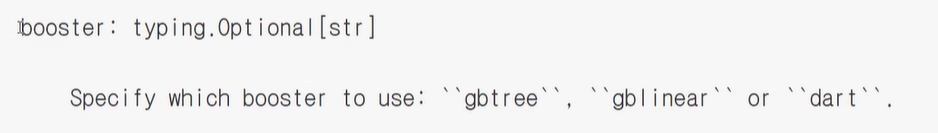